In [5]:
from pprint import pprint
from numpy import diag, diagflat, dot

alpha = 1
beta = 2 * alpha
Ce = 0.1
Cd = 0
L = 10
nos_internos = 4


def espaço_interno(nos_interior):
    return L / (nos_interior + 1)


def constante_pvc(alpha, beta, nos_interior):
    D = alpha * (10**-6)
    k = beta * (10**-6)
    return 2 + ((((nos_interior + 1) ** 2) * k) / D)


def gauss_jacobi(matriz_A, matriz_x, matriz_b):

    matriz_D = diag(matriz_A)
    matriz_R = matriz_A - diagflat(matriz_D)

    for i in range(10):
        matriz_x = (matriz_b - dot(matriz_R, matriz_x)) / matriz_D
    return matriz_x


def sistema_pvc(nos_interior, alpha_, beta_):

    linha_A = [0] * nos_interior
    matriz_A = [linha_A] * nos_interior
    matriz_b = []
    matriz_x = []
    a = -1
    b = 0

    for l in range(nos_interior):
        linha = []
        for c in range(nos_interior):
            if c == l:
                linha.append(constante_pvc(alpha_, beta_, nos_interior))
            elif (c == l - 1) | (c - 1 == l):
                linha.append(a)
            else:
                linha.append(b)
        matriz_A[l] = linha

    print("\nMatriz A:")
    pprint(matriz_A)

    for l in range(nos_interior):
        if l == 0:
            matriz_b.append(Ce)
        elif l == nos_internos - 1:
            matriz_b.append(Cd)
        else:
            matriz_b.append(0)

    print("\nMatriz b:")
    print(matriz_b)

    for l in range(nos_interior):
        matriz_x.append(1)

    print("\nMatriz x:")
    print(matriz_x)

    matriz_solucao = gauss_jacobi(matriz_A, matriz_x, matriz_b)
    print("\nMatriz solucao:")

    i = 2
    j = 0
    while i <= nos_interior + 1:
        print("C{} = {}".format(i, matriz_solucao[j]))
        i += 1
        j += 1

    vetor_solucao = [Ce]
    for i in range(nos_interior):
        vetor_solucao.append(matriz_solucao[i])
    vetor_solucao.append(Cd)

    return vetor_solucao


resultadoPVC = sistema_pvc(nos_internos, alpha, beta)


Matriz A:
[[52.0, -1, 0, 0], [-1, 52.0, -1, 0], [0, -1, 52.0, -1], [0, 0, -1, 52.0]]

Matriz b:
[0.1, 0, 0, 0]

Matriz x:
[1, 1, 1, 1]

Matriz solucao:
C2 = 0.001923788646684639
C3 = 3.7009627570224883e-05
C4 = 7.119869168666427e-07
C5 = 1.3692056690114523e-08


vetor_comprimento [0, 2.0, 4.0, 6.0, 8.0, 10.0]


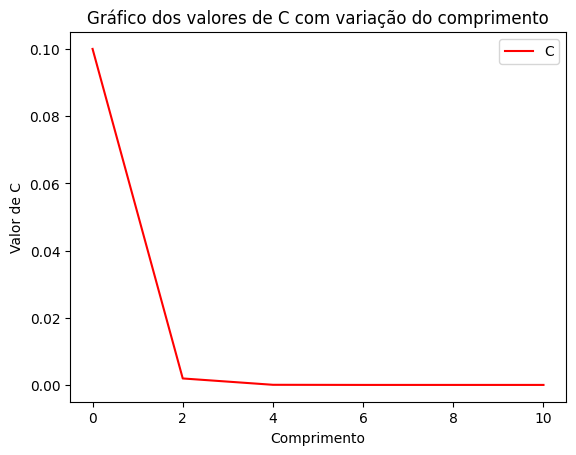

In [6]:
import matplotlib.pyplot as plt

vetor_comprimento = [0]
z = 0

while z < nos_internos + 1:
    vetor_comprimento.append(vetor_comprimento[z] + (espaço_interno(nos_internos)))
    z += 1

print("vetor_comprimento", vetor_comprimento)


def grafico_PVC():

    plt.title("Gráfico dos valores de C com variação do comprimento")
    plt.plot(vetor_comprimento, resultadoPVC, color="red", label="C")
    plt.legend()
    plt.xlabel("Comprimento")
    plt.ylabel("Valor de C")
    plt.show()


grafico_PVC()

vetor nos internos: [4, 6, 8, 10, 12]

Resultados para nos internos = 4

Matriz A:
[[52.0, -1, 0, 0], [-1, 52.0, -1, 0], [0, -1, 52.0, -1], [0, 0, -1, 52.0]]

Matriz b:
[0.1, 0, 0, 0]

Matriz x:
[1, 1, 1, 1]

Matriz solucao:
C2 = 0.001923788646684639
C3 = 3.7009627570224883e-05
C4 = 7.119869168666427e-07
C5 = 1.3692056690114523e-08

Resultados para nos internos = 6

Matriz A:
[[100.0, -1, 0, 0, 0, 0],
 [-1, 100.0, -1, 0, 0, 0],
 [0, -1, 100.0, -1, 0, 0],
 [0, 0, -1, 100.0, -1, 0],
 [0, 0, 0, -1, 100.0, -1],
 [0, 0, 0, 0, -1, 100.0]]

Matriz b:
[0.1, 0, 0, 0, 0, 0]

Matriz x:
[1, 1, 1, 1, 1, 1]

Matriz solucao:
C2 = 0.0010001000200050034
C3 = 1.0002000500143563e-05
C4 = 1.0003000900720999e-07
C5 = 1.000400144457e-09
C6 = 1.0005005420000003e-11
C7 = 1.00051989e-13

Resultados para nos internos = 8

Matriz A:
[[164.0, -1, 0, 0, 0, 0, 0, 0],
 [-1, 164.0, -1, 0, 0, 0, 0, 0],
 [0, -1, 164.0, -1, 0, 0, 0, 0],
 [0, 0, -1, 164.0, -1, 0, 0, 0],
 [0, 0, 0, -1, 164.0, -1, 0, 0],
 [0, 0, 0, 0, -1, 

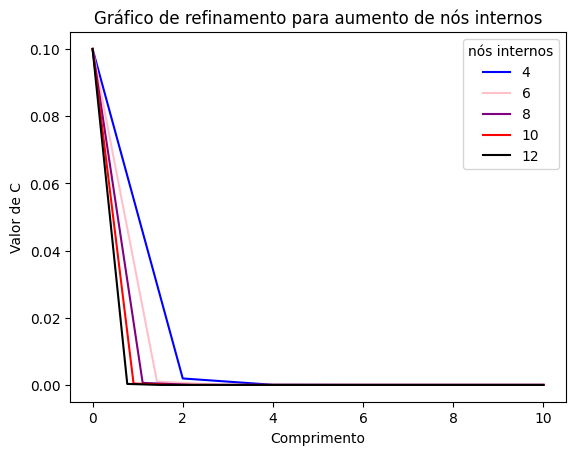

In [7]:
def refinamento():
    vetor_nos_internos = [nos_internos]

    for i in range(0, 4):
        vetor_nos_internos.append(vetor_nos_internos[i] + 2)

    print("vetor nos internos:", vetor_nos_internos)

    for i in range(0, 5):
        vetor_comprimento = [0]
        z = 0
        while z < vetor_nos_internos[i] + 1:
            vetor_comprimento.append(
                vetor_comprimento[z] + (espaço_interno(vetor_nos_internos[i]))
            )
            z += 1
        cor = ["blue", "pink", "purple", "red", "black"]
        print("\nResultados para nos internos = {}".format(vetor_nos_internos[i]))
        resultados_PVC = sistema_pvc(vetor_nos_internos[i], alpha, beta)
        plt.title("Gráfico dos valores de C com variação do comprimento")
        plt.plot(
            vetor_comprimento, resultados_PVC, color=cor[i], label=vetor_nos_internos[i]
        )
        plt.legend(title="nós internos")
        plt.xlabel("Comprimento")
        plt.ylabel("Valor de C")

    plt.title("Gráfico de refinamento para aumento de nós internos")
    plt.show()


refinamento()


Resultados para alpha = 1 e beta = 2

Matriz A:
[[52.0, -1, 0, 0], [-1, 52.0, -1, 0], [0, -1, 52.0, -1], [0, 0, -1, 52.0]]

Matriz b:
[0.1, 0, 0, 0]

Matriz x:
[1, 1, 1, 1]

Matriz solucao:
C2 = 0.001923788646684639
C3 = 3.7009627570224883e-05
C4 = 7.119869168666427e-07
C5 = 1.3692056690114523e-08

Resultados para alpha = 1 e beta = 2

Matriz A:
[[52.0, -1, 0, 0], [-1, 52.0, -1, 0], [0, -1, 52.0, -1], [0, 0, -1, 52.0]]

Matriz b:
[0.1, 0, 0, 0]

Matriz x:
[1, 1, 1, 1]

Matriz solucao:
C2 = 0.001923788646684639
C3 = 3.7009627570224883e-05
C4 = 7.119869168666427e-07
C5 = 1.3692056690114523e-08

Resultados para alpha = 2 e beta = 2

Matriz A:
[[27.0, -1, 0, 0], [-1, 27.0, -1, 0], [0, -1, 27.0, -1], [0, 0, -1, 27.0]]

Matriz b:
[0.1, 0, 0, 0]

Matriz x:
[1, 1, 1, 1]

Matriz solucao:
C2 = 0.003708798216792387
C3 = 0.00013755184243914332
C4 = 5.101511312382056e-06
C5 = 1.8894526978518202e-07

Resultados para alpha = 1 e beta = 1.0

Matriz A:
[[27.0, -1, 0, 0], [-1, 27.0, -1, 0], [0, -1, 27.

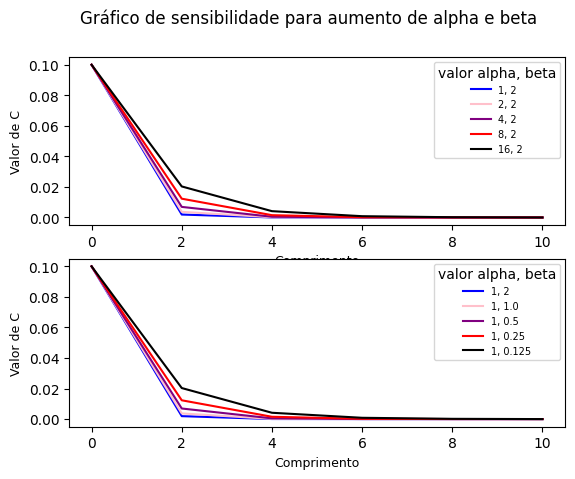

In [8]:
def sensibilidade():

    vetor_alpha_normal = [alpha]
    vetor_alpha = [alpha]
    vetor_beta_normal = [beta]
    vetor_beta = [beta]

    for i in range(0, 4):
        vetor_alpha.append(vetor_alpha[i] * 2)
        vetor_alpha_normal.append(vetor_alpha_normal[i])
        vetor_beta.append(vetor_beta[i] / 2)
        vetor_beta_normal.append(vetor_beta_normal[i])

    fig, (grafico_alpha, grafico_beta) = plt.subplots(2, 1)
    for i in range(0, 5):

        cor = ["blue", "pink", "purple", "red", "black"]
        print(
            "\nResultados para alpha = {} e beta = {}".format(
                vetor_alpha[i], vetor_beta_normal[i]
            )
        )

        resultado_PVC_alpha = sistema_pvc(
            nos_internos, vetor_alpha[i], vetor_beta_normal[i]
        )

        legenda_alpha_normal = "{}, {}".format(vetor_alpha[i], vetor_beta_normal[i])

        grafico_alpha.plot(
            vetor_comprimento,
            resultado_PVC_alpha,
            color=cor[i],
            label=legenda_alpha_normal,
        )
        grafico_alpha.legend(title="valor alpha, beta", fontsize=7)
        grafico_alpha.set_xlabel("Comprimento", fontsize=9)
        grafico_alpha.set_ylabel("Valor de C", fontsize=9)

        print(
            "\nResultados para alpha = {} e beta = {}".format(
                vetor_alpha_normal[i], vetor_beta[i]
            )
        )

        resultado_PVC_beta = sistema_pvc(
            nos_internos, vetor_alpha_normal[i], vetor_beta[i]
        )

        legenda_beta_normal = "{}, {}".format(vetor_alpha_normal[i], vetor_beta[i])

        grafico_beta.plot(
            vetor_comprimento,
            resultado_PVC_beta,
            color=cor[i],
            label=legenda_beta_normal,
        )
        grafico_beta.legend(title="valor alpha, beta", fontsize=7)
        grafico_beta.set_xlabel("Comprimento", fontsize=9)
        grafico_beta.set_ylabel("Valor de C", fontsize=9)

    plt.suptitle("Gráfico de sensibilidade para aumento de alpha e beta")
    plt.show()


sensibilidade()
